<div style="font-size: 30px;">
TechSakhsham Edunet Internship Project
</div>

<div style="font-size: 23px;">
Project 3: Identifying Shopping Trends using Data Analysis
</div>

In [1]:
# importing libraries
import numpy as np # Importing the numpy library for array operations and mathematical functions
import pandas as pd # Use for exploring the data 
import seaborn as sns # it has also plot
import matplotlib.pyplot as plt # for some extra plot functions
import plotly.express as px # this library can makes interactive plots

In [2]:
# reading the data set
shop = pd.read_csv('shopping_trends_updated.csv')

In [3]:
shop.shape

(3900, 18)

In [4]:
# Print column names to check for any mismatches
print(shop.columns)


Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')


<div style="font-size: 28px;">

*Questions and Observations
</div>

1. What is the overall distribution of customer ages in the dataset?

Age Range
18-24    417
25-34    755
35-44    729
45-54    752
55-64    751
65+      360
Name: count, dtype: int64


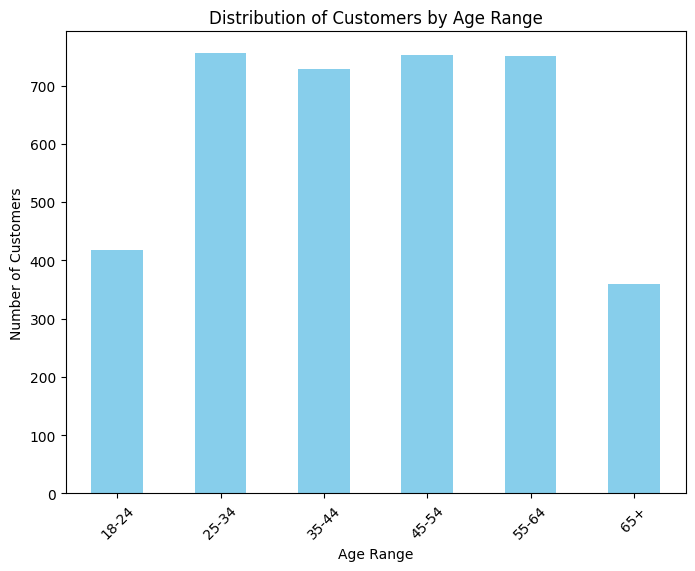

In [5]:
age_bins = [18, 24, 34, 44, 54, 64, 69]  # Define the age ranges
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Assign each customer's age to an age bin
shop['Age Range'] = pd.cut(shop['Age'], bins=age_bins, labels=age_labels, right=True)
# Count the number of people in each age range
age_range_counts = shop['Age Range'].value_counts().sort_index()

# Print the age range counts
print(age_range_counts)

# Plot the histogram
plt.figure(figsize=(8, 6))
shop['Age Range'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Customers by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


<div style="font-size: 14px;">

#### Observation:
- The dataset shows that the highest number of customers falls within the **25-34 age range** (755 customers), followed closely by the **45-54** and **55-64** age groups, with 752 and 751 customers, respectively.
- The **35-44 age range** has 729 customers, which is slightly lower than the previous two age groups but still significant.
- The **18-24 age group** has the lowest number of customers at 417, indicating that younger customers are less represented in this dataset.
- The **65+ age range**, with 360 customers, has the least number of customers, suggesting that older individuals might be less engaged with the products or services offered by the shop/brand.

</div>

2. Which gender has the highest number of purchases?

Gender
Male      2652
Female    1248
Name: count, dtype: int64


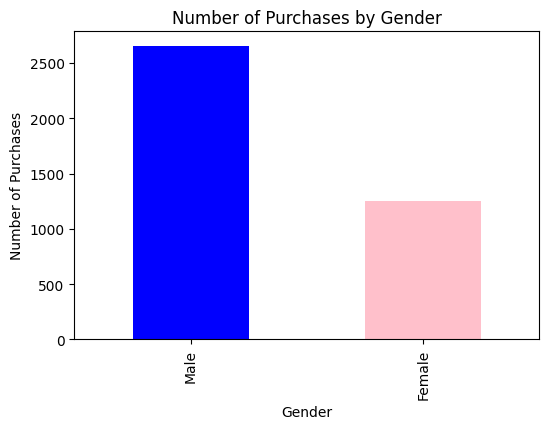

In [6]:
# Count purchases by gender
gender_counts = shop['Gender'].value_counts()
print(gender_counts)

# Visualization
gender_counts.plot(kind='bar', color=['blue', 'pink'], figsize=(6, 4))
plt.title('Number of Purchases by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Purchases')
plt.show()


<div style="font-size: 14px;">

#### Observations:
- **Male** customers have made **2652** purchases, while **Female** customers have made **1248** purchases.
- The number of purchases by male customers is significantly higher than that of female customers.

#### Suggestions:
- Consider designing targeted marketing campaigns to engage female customers more and encourage repeat purchases.
- Explore the possibility of gender-based product preferences, which could help tailor product offerings for male and female customers.
- Implement promotional strategies specifically for female customers to bridge the gap in purchases.
- Further analyze the correlation between gender and product categories to better understand purchasing behaviors and optimize stock and marketing.

</div>

3. Are there any noticeable differences in purchase behavior between locations?

Location
Alabama           59.112360
Alaska            67.597222
Arizona           66.553846
Arkansas          61.113924
California        59.000000
Colorado          56.293333
Connecticut       54.179487
Delaware          55.325581
Florida           55.852941
Georgia           58.797468
Hawaii            57.723077
Idaho             60.075269
Illinois          61.054348
Indiana           58.924051
Iowa              60.884058
Kansas            54.555556
Kentucky          55.721519
Louisiana         57.714286
Maine             56.987013
Maryland          55.755814
Massachusetts     60.888889
Michigan          62.095890
Minnesota         56.556818
Mississippi       61.037500
Missouri          57.913580
Montana           60.250000
Nebraska          59.448276
Nevada            63.379310
New Hampshire     59.422535
New Jersey        56.746269
New Mexico        61.901235
New York          60.425287
North Carolina    60.794872
North Dakota      62.891566
Ohio              60.376623
Oklahoma   

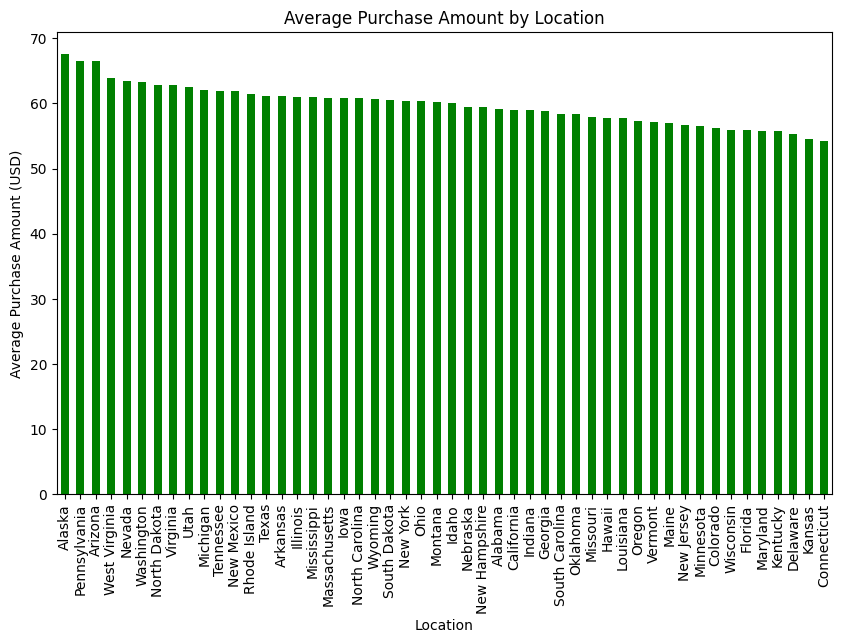

In [7]:
location_purchase = shop.groupby('Location')['Purchase Amount (USD)'].mean()
print(location_purchase)

location_purchase.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Average Purchase Amount by Location')
plt.xlabel('Location')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()


<div style="font-size: 14px;">

#### Observation:
- **Alaska** has the highest average purchase amount at **67.60 USD**.
- **West Virginia** follows closely with an average of **63.88 USD**.
- On the other hand, **Connecticut** has the lowest average purchase amount at **54.18 USD**.
- Most locations seem to have an average purchase amount between **55 USD** and **62 USD**, suggesting that customers across different states tend to spend similarly, with certain states (e.g., Alaska, West Virginia) having higher purchase amounts.

#### Suggestions:
- **Target High-Spending Regions**: Since locations like **Alaska**, **West Virginia**, and **Pennsylvania** have higher average purchase amounts, the company could consider targeting marketing efforts more aggressively in these areas, potentially offering more premium products or services.
- **Promotions for Lower-Spending Locations**: For states with lower average purchase amounts like **Connecticut**, **Kansas**, and **Oregon**, the shop could focus on running promotions or discounts to encourage more spending or offer affordable product options to attract customers.

</div>


4. How does the frequency of purchases vary across different age groups?

Age Group
51-65    1121
36-50    1111
26-35     742
19-25     502
65+       355
0-18       69
Name: count, dtype: int64


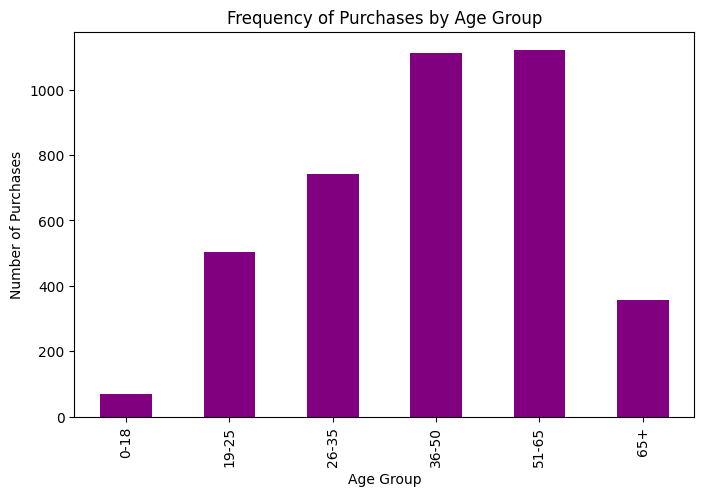

In [8]:
# Define age groups
bins = [0, 18, 25, 35, 50, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-50', '51-65', '65+']
shop['Age Group'] = pd.cut(shop['Age'], bins=bins, labels=labels)

# Count frequency by age group
age_group_counts =shop['Age Group'].value_counts()
print(age_group_counts)

# Visualization
age_group_counts.sort_index().plot(kind='bar', color='purple', figsize=(8, 5))
plt.title('Frequency of Purchases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Purchases')
plt.show()


<div style="font-size: 14px;">

#### Observation:
- The **51-65 age group** has the highest frequency of purchases with **1121 purchases**, followed closely by the **36-50 age group** with **1111 purchases**.
- The **26-35 age group** has a significant number of purchases (**742 purchases**), indicating a strong presence of young adults engaging with the products or services.
- The **19-25 age group** has **502 purchases**, suggesting that while young adults are purchasing, they are less frequent compared to the older age groups.
- The **65+ age group** has **355 purchases**, which is comparatively low, indicating that older individuals may be less frequent purchasers or less engaged with the shop's offerings.
- The **0-18 age group** shows a very low frequency of purchases (**69 purchases**), which might suggest that the shop's target demographic does not include many young children or teenagers.

#### Suggestions:
- **Target the 51-65 Age Group**: Since the **51-65** and **36-50** age groups show the highest purchase frequency, the shop should consider tailoring products and marketing campaigns that cater to the needs and preferences of these age groups, including promotions for middle-aged to older adults.
- **Increase Engagement for Younger Age Groups**: The **19-25** and **0-18** age groups have fewer purchases, so the shop could explore strategies to engage this demographic, such as offering discounts, youth-oriented products, or more dynamic advertising.
- **Leverage High-Frequency Customers**: Focus on retaining customers in the **51-65** and **36-50** groups with loyalty programs, exclusive deals, or special services to maintain their high frequency of purchases.
</div>


5. How does the average purchase amount vary across different product categories?

Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64


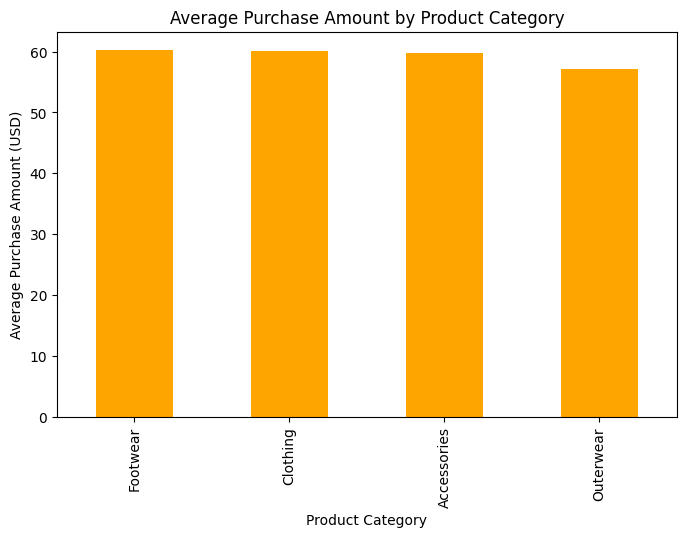

In [9]:
# Average purchase amount by category
category_avg_purchase = shop.groupby('Category')['Purchase Amount (USD)'].mean()
print(category_avg_purchase)

# Visualization
category_avg_purchase.sort_values(ascending=False).plot(kind='bar', figsize=(8, 5), color='orange')
plt.title('Average Purchase Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()


<div style="font-size: 14px;">

#### Observation:
- The categories have similar average purchase amounts, suggesting that customers tend to spend about the same across these different types of products.
- This could imply that no single category dominates in terms of spending, and customer preferences might be more balanced across these categories.

#### Suggestions:
- **Focus on High-Spending Categories**: Since **Footwear** and **Clothing** have the highest average purchase amounts, the shop could increase inventory or introduce premium items in these categories to attract more spending from customers.
- **Promotions for Accessories and Outerwear**: The **Accessories** and **Outerwear** categories could benefit from targeted promotions or bundling with higher-spending categories to boost their sales.
- **Cross-Promote Categories**: Utilize cross-selling strategies between categories, particularly pairing **Footwear** and **Clothing** or **Accessories** with higher-value items, to encourage customers to increase their average spend.
</div>


6. How does the average purchase amount differ between male and female customers?

Gender
Female    60.249199
Male      59.536199
Name: Purchase Amount (USD), dtype: float64


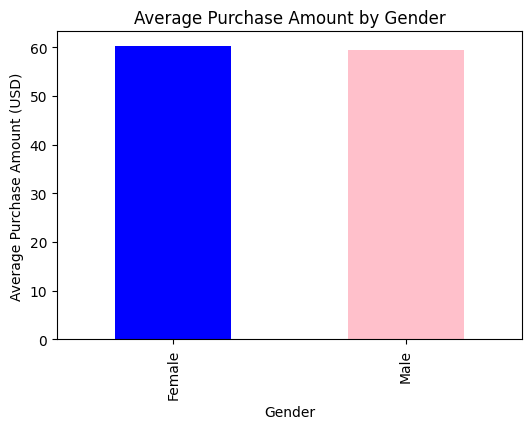

In [10]:
# Average purchase amount by gender
gender_avg_purchase = shop.groupby('Gender')['Purchase Amount (USD)'].mean()
print(gender_avg_purchase)

# Visualization
gender_avg_purchase.plot(kind='bar', figsize=(6, 4), color=['blue', 'pink'])
plt.title('Average Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()


<div style="font-size: 14px;">

**Observation:**
- The average purchase amount for **Female** customers is **$60.25**, which is slightly higher than the average purchase amount for **Male** customers, which is **$59.54**.
- The difference between the two is minimal, suggesting that both genders are spending relatively similar amounts on average.

**Suggestions:**
- **Targeted Marketing**: While the difference in spending between genders is not significant, the brand could still experiment with tailored marketing strategies to target each gender more effectively, based on other factors like product preferences.
- **Promotions and Discounts**: The brand could offer promotions or discounts that appeal specifically to each gender, encouraging higher spending, even if the current averages are close.
</div>


8. How does the presence of a discount affect the purchase decision of customers?

Discount Applied
No     2223
Yes    1677
Name: count, dtype: int64


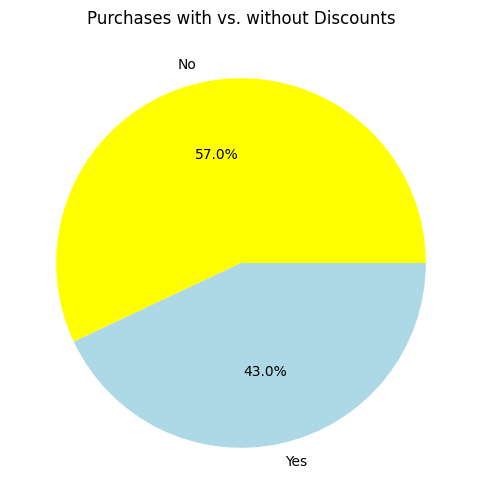

In [11]:
# Count purchases with/without discounts
discount_counts = shop['Discount Applied'].value_counts()
print(discount_counts)

# Visualization
discount_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), colors=['yellow', 'lightblue'])
plt.title('Purchases with vs. without Discounts')
plt.ylabel('')
plt.show()


<div style="font-size: 14px;">

**Observation:**
- A total of **2,223 purchases** were made without a discount, whereas **1,677 purchases** were made with a discount applied.
- This suggests that the majority of customers are still making purchases without needing a discount, although a significant portion (about 43%) of customers did benefit from a discount.

**Suggestions:**
- **Discount Strategy**: The brand could consider offering more frequent or targeted discounts, particularly for items with lower purchase volumes, to increase conversion rates.
- **Customer Segmentation**: It might be useful to analyze the customer segments who use discounts more frequently and tailor promotions to these specific groups, encouraging repeat purchases or larger cart sizes.
</div>


9. What is the relationship between customer gender and the likelihood of purchasing products from specific categories (e.g., Electronics, Clothing, Home Goods)?

Category  Accessories  Clothing  Footwear  Outerwear
Gender                                              
Female            392       556       199        101
Male              848      1181       400        223


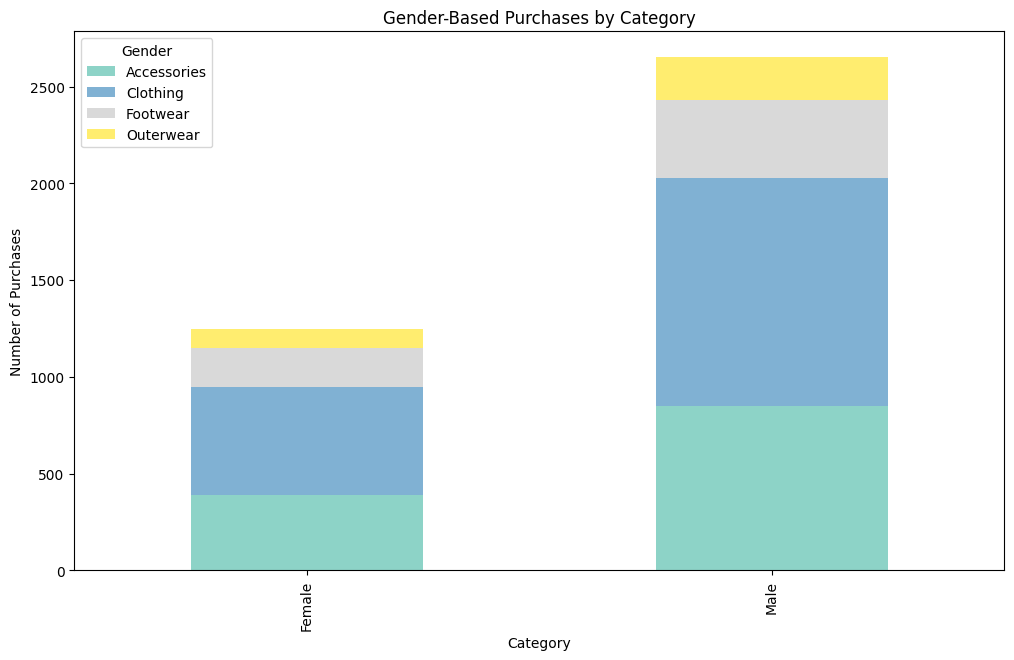

In [12]:
# Group by 'Gender' and 'Category' and count the number of purchases
gender_category_purchases = shop.groupby(['Gender', 'Category'])['Customer ID'].count().unstack()
print(gender_category_purchases)

# Visualization
gender_category_purchases.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Set3')
plt.title('Gender-Based Purchases by Category')
plt.xlabel('Category')
plt.ylabel('Number of Purchases')
plt.legend(title='Gender')
plt.show()


<div style="font-size: 14px;">

#### Observations:
- **Clothing** has the highest total purchase count for both **Female** and **Male** customers, indicating its popularity across both genders.
- **Accessories** and **Outerwear** have a higher number of purchases by **Male** customers compared to **Female**, with **Male** purchases in Accessories being particularly significant.
- **Footwear** shows a more balanced split between the genders, though **Male** customers have a noticeably higher number of purchases.

#### Suggestions:

- **Enhance marketing for Accessories to appeal to Female customers**: Since Male customers dominate Accessories purchases, there may be an opportunity to increase Female customer engagement with targeted promotions or campaigns.
- **Maintain the strong focus on Clothing**: As it is the most popular category across both genders, continue efforts to keep it attractive, perhaps by introducing seasonal collections or expanding product variety.
- **Target Footwear to Male customers**: Since **Male** customers lead in Footwear purchases, consider marketing Footwear as a segment of interest for men, with custom recommendations or special offers.
- **Explore the potential for Outerwear among Female customers**: Given the relatively lower number of purchases by females, promotions or styling options tailored specifically to this demographic could drive higher engagement.
</div>


10. What are the most commonly purchased items in each category?

C:\Users\advai\AppData\Local\Temp\ipykernel_25924\4031688278.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_items_by_category = category_item_counts.groupby('Category').apply(lambda x: x.nlargest(5, 'Purchase Count')).reset_index(drop=True)


       Category Item Purchased  Purchase Count
0   Accessories        Jewelry             171
1   Accessories           Belt             161
2   Accessories     Sunglasses             161
3   Accessories          Scarf             157
4   Accessories            Hat             154
5      Clothing         Blouse             171
6      Clothing          Pants             171
7      Clothing          Shirt             169
8      Clothing          Dress             166
9      Clothing        Sweater             164
10     Footwear        Sandals             160
11     Footwear          Shoes             150
12     Footwear       Sneakers             145
13     Footwear          Boots             144
14    Outerwear         Jacket             163
15    Outerwear           Coat             161


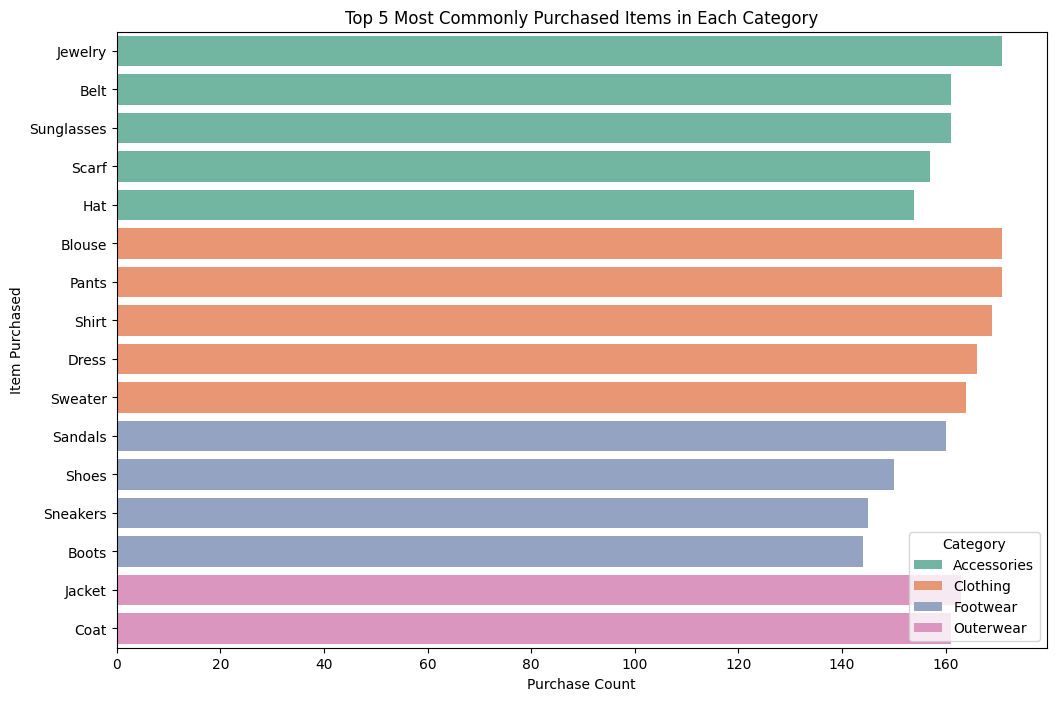

In [13]:
# Group the data by category and item, then count the occurrences of each item
category_item_counts = shop.groupby(['Category', 'Item Purchased']).size().reset_index(name='Purchase Count')

# For each category, get the top purchased items
top_items_by_category = category_item_counts.groupby('Category').apply(lambda x: x.nlargest(5, 'Purchase Count')).reset_index(drop=True)

# Display the results
print(top_items_by_category)

# Visualization: Bar plot for top purchased items in each category
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.barplot(x='Purchase Count', y='Item Purchased', hue='Category', data=top_items_by_category, palette='Set2')
plt.title('Top 5 Most Commonly Purchased Items in Each Category')
plt.xlabel('Purchase Count')
plt.ylabel('Item Purchased')
plt.show()


<div style="font-size: 14px;">

#### Observation:
- The most commonly purchased items across the categories are:
  - **Accessories**: Jewelry, Belt, Sunglasses, Scarf, and Hat, all of which have similar purchase counts ranging from 154 to 171.
  - **Clothing**: Blouse and Pants have the highest purchase count at 171, followed closely by Shirt, Dress, and Sweater with counts between 164 and 169.
  - **Footwear**: Sandals have the highest purchase count at 160, followed by Shoes, Sneakers, and Boots, all showing fairly similar numbers.
  - **Outerwear**: Jacket and Coat are the most commonly purchased items in this category, with counts of 163 and 161 respectively.

#### Suggestions:
- Since the items within each category have similar purchase counts, it's important to consider other factors such as price points, customer preferences, and seasonal trends when analyzing the performance of these items.
- The **Accessories** and **Clothing** categories show strong overall sales, while **Footwear** and **Outerwear** have slightly fewer items. This might indicate that customers spend more on accessories and clothing compared to footwear or outerwear, suggesting a potential opportunity to explore different promotional strategies or new product introductions in the latter categories.
</div>


11. Are there any correlations between the size of the product and the purchase amount?

                       Size Numeric  Purchase Amount (USD)
Size Numeric               1.000000              -0.022456
Purchase Amount (USD)     -0.022456               1.000000


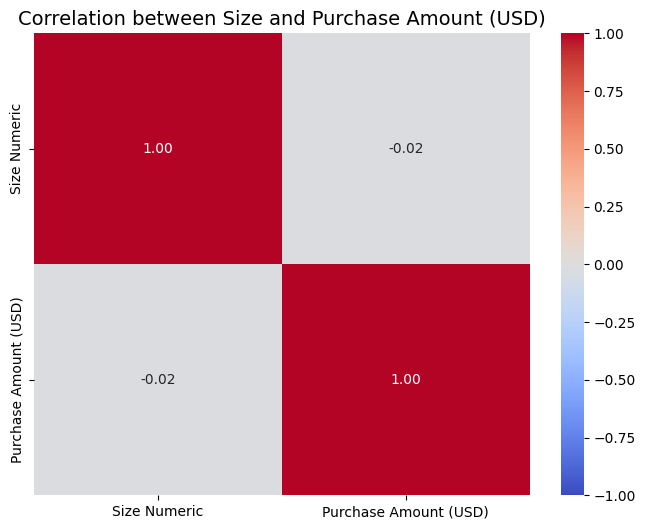

In [14]:
# Define a mapping for 'Size' categories to numeric values
size_mapping = {
    'S': 1,
    'M': 2,
    'L': 3,
    'XL': 4,
    'XXL': 5,
    # Add other sizes if present in your data
}

# Apply the mapping to the 'Size' column
shop['Size Numeric'] = shop['Size'].map(size_mapping)

# Now, calculate the correlation again
correlation = shop[['Size Numeric', 'Purchase Amount (USD)']].corr()
print(correlation)

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, fmt='.2f')

# Set the title
plt.title('Correlation between Size and Purchase Amount (USD)', fontsize=14)

# Display the plot
plt.show()


<div style="font-size: 14px;">

#### Observation:
- The correlation between the product size (numeric) and the purchase amount (USD) is **-0.022**, indicating a very weak negative correlation.
- This suggests that there is little to no relationship between the size of the product and the amount spent by the customer.
  
#### Suggestions:
- Since the correlation is very weak, it may not be valuable to use product size as a key factor when analyzing purchase amounts. Other factors such as product category, promotions, or customer demographics might offer more insight into spending behavior.
- However, it is still worth exploring if specific product categories or types of items (e.g., larger clothing vs smaller accessories) have different impacts on the total purchase amount.
</div>


12. Are there any specific colors that are more popular among customers?

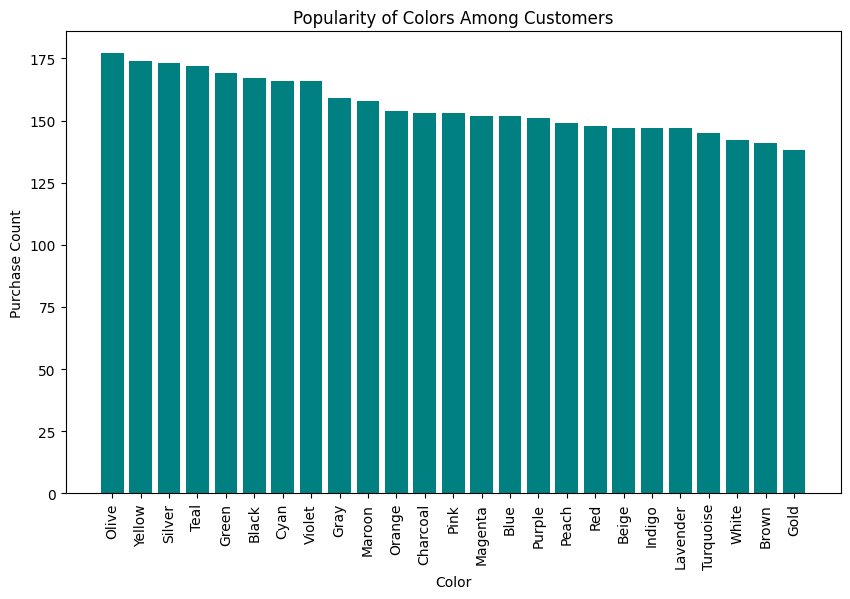

In [15]:
# Grouping data by 'Color' and counting the number of purchases for each color
color_popularity = shop['Color'].value_counts().reset_index()
color_popularity.columns = ['Color', 'Purchase Count']

# Visualizing the result
plt.figure(figsize=(10, 6))
plt.bar(color_popularity['Color'], color_popularity['Purchase Count'], color='teal')
plt.title('Popularity of Colors Among Customers')
plt.xlabel('Color')
plt.ylabel('Purchase Count')
plt.xticks(rotation=90)
plt.show()


**Observation:**
<div style="font-size: 14px;">
The dataset indicates that the most popular colors among customers are Olive, Yellow, and Silver, with 177, 174, and 173 purchases, respectively. These colors are closely followed by Teal (172), Green (169), and Black (167), all showing high purchase counts.
Among the less popular colors, Turquoise, White, Brown and Gold have relatively lower counts, but still represent a noticeable portion of the total sales.
This distribution suggests that neutral colors like Olive, Yellow, and Silver are favored by the customers, whereas more vibrant colors such as  White, Brown and Gold are less frequently chosen.
</div>

**Suggestions:**
<div style="font-size: 14px;">
Based on the popularity of certain colors, the shop or brand may want to focus more on promoting or restocking items in the top three colors—Olive, Yellow, and Silver. They could also analyze customer preferences in different regions or demographics to tailor color offerings better.
Additionally, exploring why certain colors like Gold and Brown are less popular could be useful, potentially adjusting marketing or product designs to align with customer tastes.
</div>


13. Which specific items or product categories have the highest average ratings?

   Item Purchased  Review Rating
6          Gloves       3.864286
14        Sandals       3.841250
3           Boots       3.812500
8             Hat       3.806494
24        T-shirt       3.782993
19          Skirt       3.782278
7         Handbag       3.775163
23        Sweater       3.767073
10         Jacket       3.763190
1            Belt       3.761491


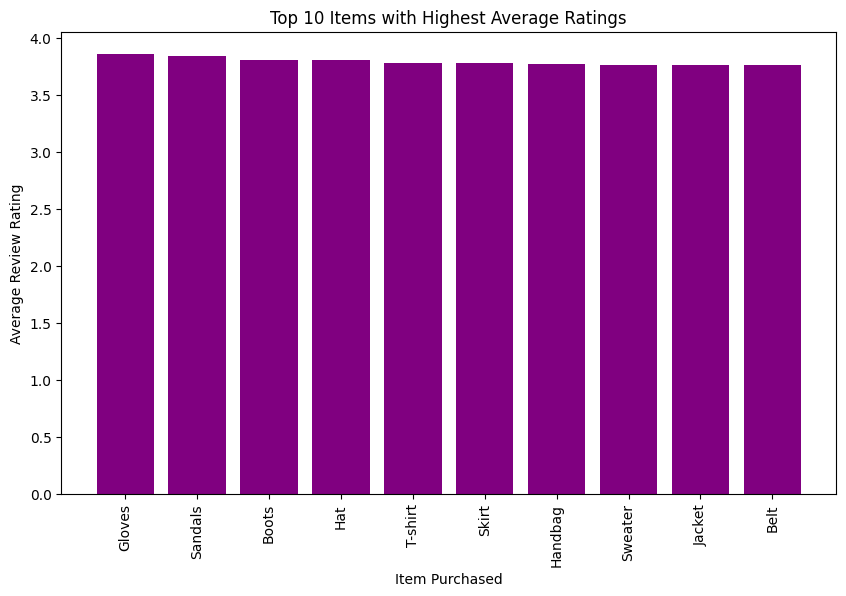

In [16]:
# Grouping data by 'Item Purchased' and calculating the average rating
item_avg_rating = shop.groupby('Item Purchased')['Review Rating'].mean().reset_index()

# Sorting the items by average rating in descending order
item_avg_rating = item_avg_rating.sort_values(by='Review Rating', ascending=False)

# Top items with highest average ratings
top_items = item_avg_rating.head(10)  # Top 10 items with highest average rating

print(top_items)

# Visualizing the result
plt.figure(figsize=(10, 6))
plt.bar(top_items['Item Purchased'], top_items['Review Rating'], color='purple')
plt.title('Top 10 Items with Highest Average Ratings')
plt.xlabel('Item Purchased')
plt.ylabel('Average Review Rating')
plt.xticks(rotation=90)
plt.show()


<div style="font-size: 14px;">

**Observation:**
- The **top 10 items with the highest average ratings** are as follows:
  - **Gloves** have the highest average rating of 3.86, followed closely by **Sandals** with 3.84, and **Boots** with 3.81.
  - Other notable items in the top 10 include **Hat**, **T-shirt**, and **Skirt**, with ratings above 3.76.
  - The average ratings of all top items fall within a narrow range (3.76 - 3.86), indicating that most of the items have relatively similar customer satisfaction.

**Suggestions:**
- **Focus on high-rated items**: Since **Gloves** and **Sandals** have the highest ratings, the company could focus on promoting these products more heavily.
- **Address potential issues with lower-rated items**: If any items with lower ratings are identified, it may be worth investigating customer feedback to improve product quality or adjust marketing strategies.
- **Encourage repeat purchases**: Items with consistently high ratings may inspire customer loyalty, and the company can leverage this by offering special deals or incentives for repeat buyers.

</div>


14. Are there any specific seasons or months where customer spending is significantly higher?

Season
Fall      61.556923
Spring    58.737738
Summer    58.405236
Winter    60.357364
Name: Purchase Amount (USD), dtype: float64


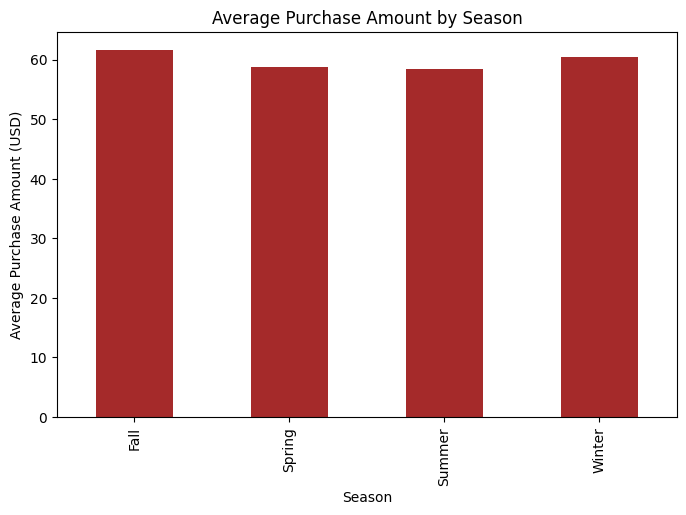

In [17]:
# Average purchase amount by season
season_avg_purchase = shop.groupby('Season')['Purchase Amount (USD)'].mean()
print(season_avg_purchase)

# Visualization
season_avg_purchase.plot(kind='bar', figsize=(8, 5), color='brown')
plt.title('Average Purchase Amount by Season')
plt.xlabel('Season')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

<div style="font-size: 14px;">

**Observation:**
- The **highest average spending** occurs in **Fall**, with an average of **61.56 USD** per purchase.
- **Winter** follows closely with an average of **60.36 USD**, showing that cold weather seasons may influence spending.
- **Spring** and **Summer** see slightly lower average purchase amounts, with **Spring** at **58.74 USD** and **Summer** at **58.41 USD**.

**Suggestions:**
- **Leverage Fall for promotions**: Since Fall shows the highest spending, the company can focus on running seasonal promotions or marketing campaigns during this period to maximize revenue.
- **Improve offerings for Spring and Summer**: With Spring and Summer having lower spending, the company could introduce new products or discounts to stimulate demand during these months.
- **Consider seasonal marketing strategies**: Tailoring marketing efforts and stock availability based on season-specific trends can help in maintaining or boosting customer engagement year-round.

</div>


15. Which age group has the highest frequency of purchases during specific seasons?

C:\Users\advai\AppData\Local\Temp\ipykernel_25924\2863781299.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_season_counts = shop.groupby(['Age Group', 'Season'])['Customer ID'].count().unstack()


Season     Fall  Spring  Summer  Winter
Age Group                              
0-18         13      17      13      26
19-25       119     137     117     129
26-35       182     177     200     183
36-50       293     269     267     282
51-65       282     291     279     269
65+          86     108      79      82


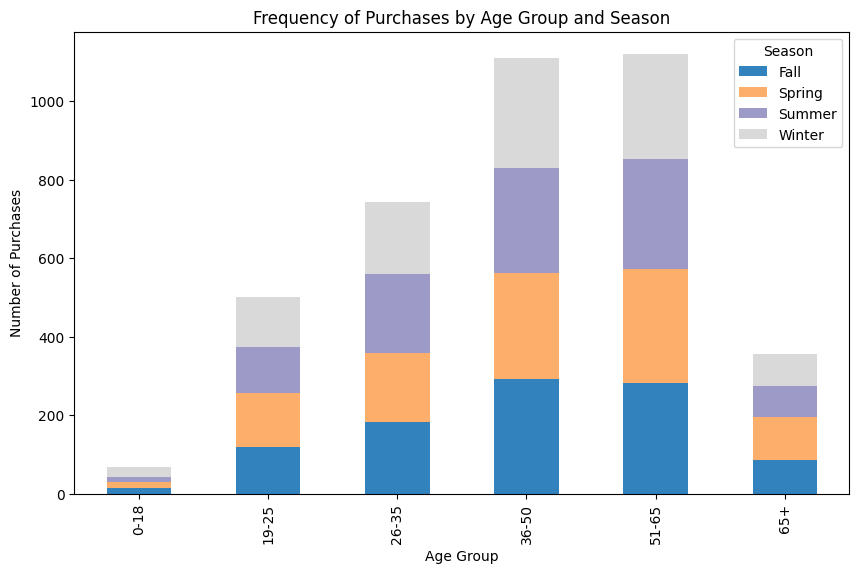

In [18]:
# Count purchases by age group and season
age_season_counts = shop.groupby(['Age Group', 'Season'])['Customer ID'].count().unstack()
print(age_season_counts)

# Visualization
age_season_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20c')
plt.title('Frequency of Purchases by Age Group and Season')
plt.xlabel('Age Group')
plt.ylabel('Number of Purchases')
plt.legend(title='Season')
plt.show()

<div style="font-size: 14px;">

#### Observations:
- **Highest Frequency of Purchases:**
  - The **26-35 age group** has the highest frequency of purchases across all seasons, with **204 purchases** in Summer and consistently high numbers across other seasons as well.
  - The **36-45 age group** follows closely, with **195 purchases** in Winter and generally balanced numbers throughout the year.
  - The **46-55 age group** also shows significant activity, with **195 purchases** in Fall and **194** in Spring, indicating a consistent pattern across seasons.

- **Lower Frequency of Purchases:**
  - The **65+ age group** has the lowest frequency of purchases across all seasons, with a maximum of **133 purchases** in Spring. This suggests that older customers are less active in terms of purchasing, especially when compared to other age groups.
  - The **0-18 age group** has no recorded purchases, likely indicating that this group isn't engaged in the products or services offered in the dataset.

- **Seasonal Trends:**
  - **Spring** and **Fall** have relatively similar purchase frequencies across most age groups, but **Winter** and **Summer** tend to see higher activity from groups aged 26-55, especially in **Winter** for the 36-45 age group.

#### Suggestions:
- **Targeted Marketing Campaigns:**
  - Since **26-35** and **36-45** age groups show the highest engagement across all seasons, focusing marketing efforts on these age groups could yield a better return on investment.
  - Promotional offers or tailored products can be marketed more aggressively during **Winter** and **Spring** for these age groups, as they show higher purchase frequencies in these seasons.

- **Encouraging Engagement for Older Demographics:**
  - Given the low engagement of the **65+** age group, it might be worth exploring whether certain products or services could be tailored to their interests. Special offers or a more senior-friendly shopping experience might help increase their purchasing activity.

- **Season-Specific Campaigns:**
  - The **Fall** and **Winter** months show a consistent peak for the **46-55** age group, while **Spring** and **Summer** bring more purchases from the **26-35** group. Creating season-specific campaigns with targeted products could help cater to these trends.

</div>


16. What percentage of total purchases were made using promo codes?

Promo Code Used
No     57.0
Yes    43.0
Name: proportion, dtype: float64


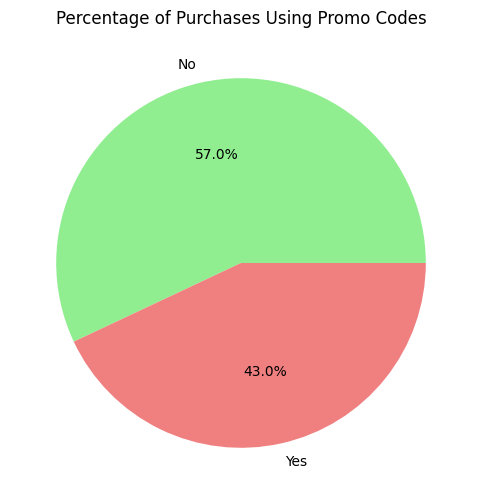

In [19]:
# Percentage of purchases with promo codes
promo_code_counts = shop['Promo Code Used'].value_counts(normalize=True) * 100
print(promo_code_counts)

# Visualization
promo_code_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), colors=['lightgreen', 'lightcoral'])
plt.title('Percentage of Purchases Using Promo Codes')
plt.ylabel('')
plt.show()

<div style="font-size: 14px;">

#### Observations:
- **Percentage of Purchases Using Promo Codes:**
  - **43%** of the total purchases were made using **promo codes**, which is a significant portion of the overall purchases.
  - The remaining **57%** of purchases were made without the use of promo codes, indicating that a majority of customers are purchasing without relying on discounts or promotional offers.

#### Suggestions:
- **Enhance Promo Code Usage:**
  - Since **43%** of customers are utilizing promo codes, it would be beneficial to increase the visibility of these codes or offer more targeted promotions to boost their use. Special incentives could be provided for first-time buyers or for larger purchases.
  - Consider analyzing the types of products or categories that perform well with promo codes and create specific offers tailored to those products, potentially increasing conversion rates.

- **Focus on Non-Promo Purchases:**
  - With **57%** of purchases occurring without promo codes, marketing strategies should also focus on value propositions that do not rely on discounts, such as product quality, customer service, and loyalty rewards.

</div>


17. How does the effect of the discount percentage on the total purchase amount vary across different product categories?

Discount Applied     No    Yes
Category                      
Accessories       42440  31760
Clothing          60585  43679
Footwear          20087  16006
Outerwear         10558   7966


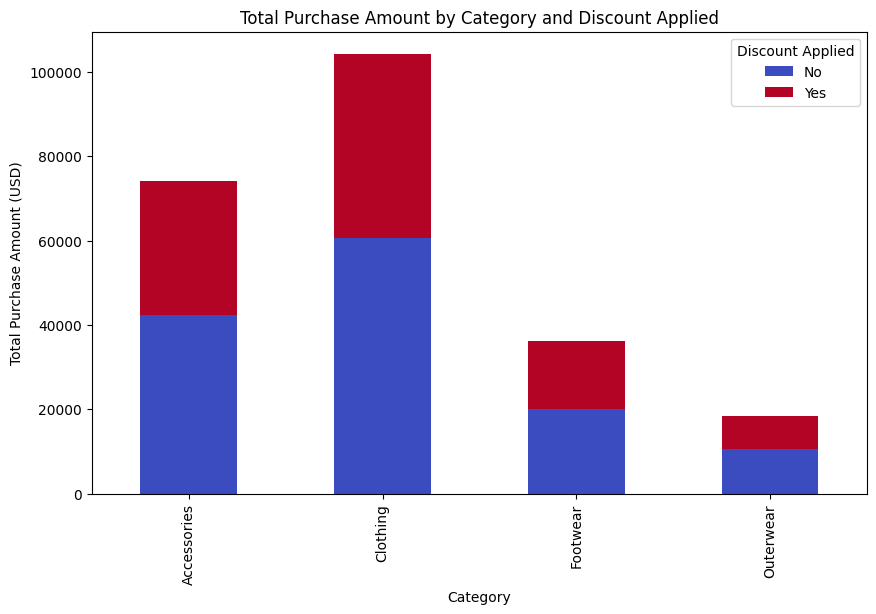

In [20]:
# Group by 'Category' and 'Discount Applied', then calculate the total purchase amount for each group
category_discount_revenue = shop.groupby(['Category', 'Discount Applied'])['Purchase Amount (USD)'].sum().unstack()
print(category_discount_revenue)
# Visualization (Total Purchase Amount by Category and Discount Applied)
category_discount_revenue.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Total Purchase Amount by Category and Discount Applied')
plt.xlabel('Category')
plt.ylabel('Total Purchase Amount (USD)')
plt.legend(title='Discount Applied')
plt.show()


<div style="font-size: 14px;">

#### Observations:
- **Clothing** shows the highest total purchase amount, with or without a discount. This suggests that **Clothing** is the most popular category among customers, and offering discounts still results in significant spending.
- **Accessories** has the largest difference in revenue between "No" and "Yes" (discount applied), implying that discounts in this category encourage more purchases, with a notable increase in spending when discounts are applied.
- **Footwear** and **Outerwear** show a more balanced revenue split between discounted and non-discounted sales, indicating that discounts may not have as strong of an effect on these categories.

#### Suggestions:

- **Focus more on offering discounts for Accessories**: The significant increase in total revenue from discounted purchases suggests that applying discounts could drive higher sales in this category.
- **Maintain the current discount strategy for Clothing**: Since Clothing already generates substantial revenue, the focus could be more on targeted promotions rather than generalized discounts.
- **Evaluate the effectiveness of discounts for Footwear and Outerwear**: Discounts may not be having a strong impact in these categories. You could consider adjusting the discount strategy or focus more on improving customer engagement in these segments.
</div>


18. Which shipping type is preferred by customers for different product categories?

Shipping Type  2-Day Shipping  Express  Free Shipping  Next Day Air  Standard  \
Category                                                                        
Accessories               206      203            195           211       208   
Clothing                  281      290            294           293       297   
Footwear                   90       96            122            93       100   
Outerwear                  50       57             64            51        49   

Shipping Type  Store Pickup  
Category                     
Accessories             217  
Clothing                282  
Footwear                 98  
Outerwear                53  


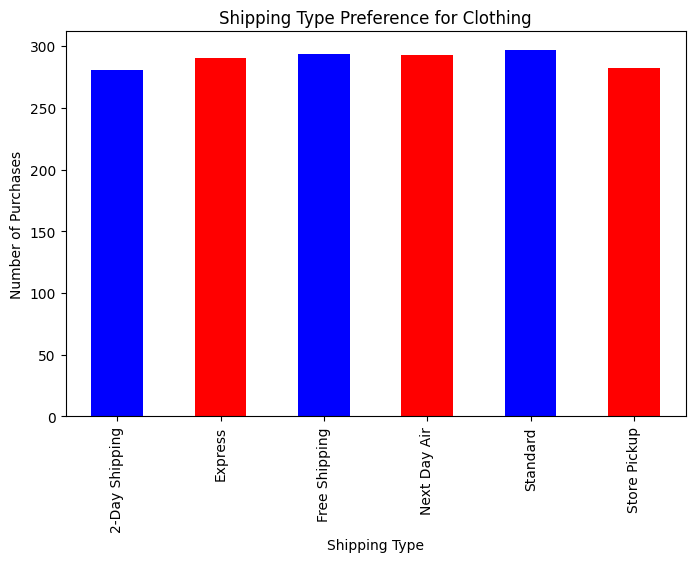

In [21]:
# Shipping type preference by category
shipping_preference = shop.groupby(['Category', 'Shipping Type'])['Customer ID'].count().unstack()
print(shipping_preference)

# Visualization for a specific category
shipping_preference.loc['Clothing'].plot(kind='bar', figsize=(8, 5), color=['blue', 'red'])
plt.title('Shipping Type Preference for Clothing')
plt.xlabel('Shipping Type')
plt.ylabel('Number of Purchases')
plt.show()

<div style="font-size: 14px;">

**Observation:**
- For the "Clothing" category, the highest preference is for "Standard" shipping, followed by "Free Shipping" and "Express." 
- "Accessories" also sees a similar pattern with "Store Pickup" being the most preferred, followed by "Next Day Air."
- "Footwear" and "Outerwear" categories show relatively lower preferences for "Store Pickup," with "Free Shipping" being the most popular in both categories.

**Suggestions:**
- Consider offering discounts or promotions for "Store Pickup" in categories like "Footwear" and "Outerwear" to boost its popularity.
- "Free Shipping" and "Express" shipping options seem to be highly favored in "Clothing," so emphasizing these options might be a good strategy for promoting sales.
- For "Accessories," since "Store Pickup" is preferred, perhaps improve the convenience or incentivize this option with loyalty points or rewards.
</div>


19. Do customers who choose expedited shipping tend to spend more on their purchases?

Shipping Type
2-Day Shipping    60.733652
Express           60.475232
Free Shipping     60.410370
Next Day Air      58.631173
Standard          58.460245
Store Pickup      59.893846
Name: Purchase Amount (USD), dtype: float64


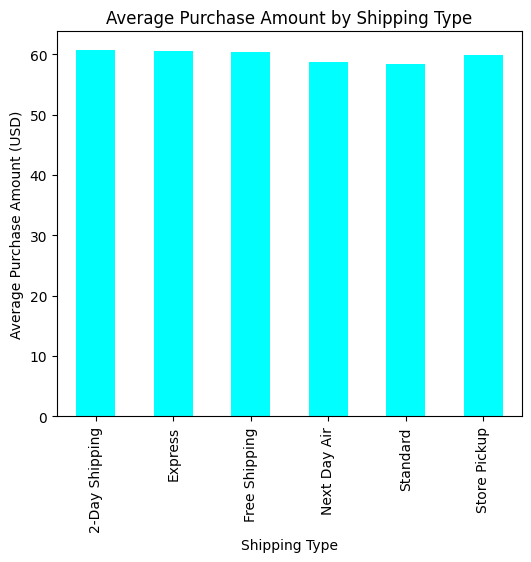

In [22]:
# Average purchase amount by shipping type
shipping_avg_purchase = shop.groupby('Shipping Type')['Purchase Amount (USD)'].mean()
print(shipping_avg_purchase)

# Visualization
shipping_avg_purchase.plot(kind='bar', figsize=(6, 5), color='cyan')
plt.title('Average Purchase Amount by Shipping Type')
plt.xlabel('Shipping Type')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

<div style="font-size: 14px;">

**Observation:**
- The average purchase amounts across different shipping types are quite similar, ranging from 58.46 USD (Standard) to 60.73 USD (2-Day Shipping). There is no significant difference in spending between the shipping options.
- The slight variations between shipping types suggest that customers may not be significantly influenced by shipping speed when it comes to spending.

**Suggestions:**
- Since the purchase amounts are nearly the same, the choice of shipping type does not appear to significantly impact the spending behavior of customers.
- To encourage higher spending, consider focusing on other factors such as discounts, bundle offers, or personalized recommendations rather than just shipping options.
- It might be worthwhile to explore other ways to differentiate the shipping types, such as providing exclusive perks or benefits for expedited shipping to attract customers who may value speed without affecting their purchase amount drastically.
</div>


20. What is the Summary of previous purchases made by customers?

count    3900.000000
mean       25.351538
std        14.447125
min         1.000000
25%        13.000000
50%        25.000000
75%        38.000000
max        50.000000
Name: Previous Purchases, dtype: float64


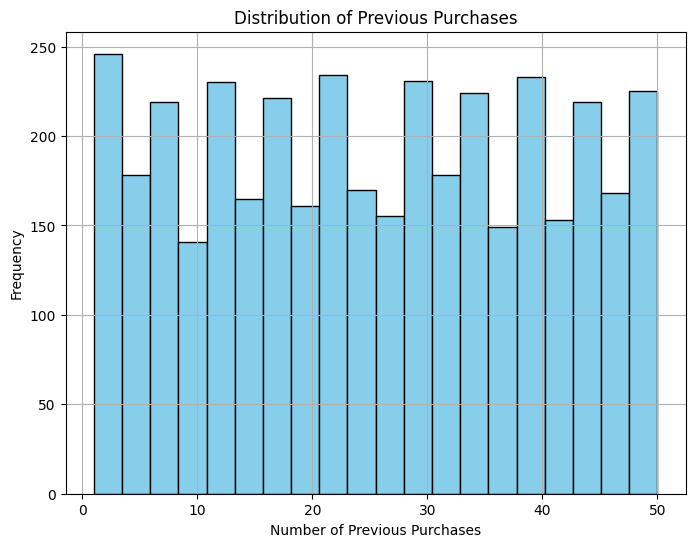

In [23]:
# Get the summary statistics of the 'Previous Purchases' column
previous_purchases_summary = shop['Previous Purchases'].describe()
print(previous_purchases_summary)

# Plot the distribution of previous purchases
plt.figure(figsize=(8, 6))
plt.hist(shop['Previous Purchases'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Previous Purchases')
plt.xlabel('Number of Previous Purchases')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<div style="font-size: 14px;">

**Observations**:
- The distribution of previous purchases is right-skewed, with most customers having made between 13 to 38 purchases. However, there is a smaller group that has made significantly more purchases, with a maximum of 50 previous purchases.
- The average number of previous purchases is around 25, indicating a solid customer base that engages in repeat purchasing.

**Suggestions**:
1. **Target Frequent Shoppers**: Focus on retaining high-frequency shoppers (top 25%) who have made 38 or more purchases. Offering loyalty programs or exclusive rewards could encourage further engagement.
2. **Encourage Repeat Purchases**: For customers with 1 or a few purchases, consider personalized incentives such as special discounts or offers to increase their chances of making repeat purchases.
3. **Segmented Marketing**: Use the information on previous purchases to create tailored campaigns for different customer segments, ensuring each group receives promotions or product suggestions relevant to their shopping behavior.

</div>
